In [2]:
import json
import os
import pandas as pd
import numpy as np
from loguru import logger
from utils.tool import *

In [3]:
edges_file = 'E:\\学习\\数模相关\\code_of_argorithm\\深圳杯C题\\edges_info.json' 
nodes_file = 'E:\\学习\\数模相关\\code_of_argorithm\\深圳杯C题\\nodes_info.json'

In [4]:
#打开文件
with open('/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/data_file/edges_info.json', 'r', encoding='utf-8') as f:
    edges_info = json.load(f)
#因为json文件中存储的边是字符串格式的元组，所以需要将其转换为实际的元组
edges_info = [{tuple(eval(edge)): info for edge, info in edge_dict.items()} for edge_dict in edges_info]

with open('/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/data_file/nodes_info.json', 'r', encoding='utf-8') as f:
    nodes_info = json.load(f)

In [5]:
for line in edges_info:
    edge = list(line.keys())[0]
edge

(23, 62)

In [6]:
edges_info[0].keys()

dict_keys([(1, 2)])

In [7]:
graph = UndirectedGraph(nodes_info, edges_info)

2025-05-18 22:20:59.883 | INFO     | utils.tool:__init__:22 - 初始化UndirectedGraph，节点数: 62, 边数: 62
2025-05-18 22:20:59.884 | INFO     | utils.tool:_build_adjacency_list:30 - 构建邻接表
2025-05-18 22:20:59.885 | INFO     | utils.tool:_build_adjacency_list:48 - 邻接表构建完成


In [8]:
def rprint(info:str,result) -> None:
    """
    打印结果
    :param info: 信息
    :param result: 结果
    :return: None
    """
    logger.info(info)
    print(result)

In [9]:
rprint("节点邻居:", graph.neighbors(17))

2025-05-18 22:20:59.898 | INFO     | utils.tool:neighbors:66 - 获取节点 17 的邻居: [4, 18]
2025-05-18 22:20:59.899 | INFO     | __main__:rprint:8 - 节点邻居:


[4, 18]


In [10]:
rprint("带有分布式发电的节点:", graph.find_nodes_by_attribute("type", "政府和机构"))

2025-05-18 22:20:59.905 | INFO     | utils.tool:find_nodes_by_attribute:275 - 查找属性 type=政府和机构 的节点: ['9', '21', '29', '36', '45', '58', '61']
2025-05-18 22:20:59.905 | INFO     | __main__:rprint:8 - 带有分布式发电的节点:


['9', '21', '29', '36', '45', '58', '61']


In [11]:
rprint("查找具有特定属性的边",graph.find_edges_by_attribute("type", "馈线间联络线"))

2025-05-18 22:21:00.174 | INFO     | utils.tool:find_edges_by_attribute:296 - 查找属性 type=馈线间联络线 的边: [(19, 29), (13, 43), (23, 62)]
2025-05-18 22:21:00.175 | INFO     | __main__:rprint:8 - 查找具有特定属性的边


[(19, 29), (13, 43), (23, 62)]


In [12]:
rprint("查找两个节点之间的路径", graph.find_path(49, 48))

2025-05-18 22:21:00.221 | INFO     | utils.tool:find_path:189 - 找到路径: [49, 44, 45, 46, 47, 48]
2025-05-18 22:21:00.221 | INFO     | __main__:rprint:8 - 查找两个节点之间的路径


[49, 44, 45, 46, 47, 48]


In [13]:
rprint("获取所有节点的度数", graph.get_all_degrees())

2025-05-18 22:21:00.231 | INFO     | utils.tool:get_all_degrees:714 - 获取所有节点的度
2025-05-18 22:21:00.233 | INFO     | __main__:rprint:8 - 获取所有节点的度数


{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0, '33': 0, '34': 0, '35': 0, '36': 0, '37': 0, '38': 0, '39': 0, '40': 0, '41': 0, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 0, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, 1: 1, 2: 2, 3: 3, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 20: 2, 21: 2, 22: 1, 17: 2, 18: 2, 19: 2, 14: 2, 15: 2, 16: 1, 23: 2, 24: 4, 25: 3, 26: 3, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 1, 33: 2, 34: 2, 35: 1, 40: 2, 41: 2, 42: 1, 36: 2, 37: 2, 38: 2, 39: 1, 43: 3, 44: 3, 45: 3, 46: 2, 47: 2, 48: 1, 49: 2, 50: 2, 51: 2, 52: 1, 53: 2, 54: 2, 55: 1, 56: 2, 57: 3, 58: 2, 59: 1, 60: 2, 61: 2, 62: 2}


In [14]:
rprint("找出两个节点之间的所有路径", graph.get_all_paths(1, 5))

2025-05-18 22:21:00.239 | INFO     | utils.tool:get_all_paths:333 - 所有路径从 1 到 5: [[1, 2, 3, 4, 5]]
2025-05-18 22:21:00.239 | INFO     | __main__:rprint:8 - 找出两个节点之间的所有路径


[[1, 2, 3, 4, 5]]


In [15]:
rprint("获取属性的统计摘要", graph.get_attribute_summary("DG"))

2025-05-18 22:21:00.251 | INFO     | utils.tool:get_attribute_summary:820 - 属性统计摘要: 
   attribute  count      mean       std  min     25%  median       75%     max
0     length     62  0.750484  0.916746  0.0  0.1600  0.3700  1.140000  4.2500
1  Reactance     62  0.063900  0.078033  0.0  0.0136  0.0315  0.097350  0.3619
2   Resistor     62  0.100634  0.120500  0.0  0.0200  0.0463  0.179725  0.5075
2025-05-18 22:21:00.252 | INFO     | __main__:rprint:8 - 获取属性的统计摘要


   attribute  count      mean       std  min     25%  median       75%     max
0     length     62  0.750484  0.916746  0.0  0.1600  0.3700  1.140000  4.2500
1  Reactance     62  0.063900  0.078033  0.0  0.0136  0.0315  0.097350  0.3619
2   Resistor     62  0.100634  0.120500  0.0  0.0200  0.0463  0.179725  0.5075


In [16]:
rprint("计算图的平均度数", graph.get_average_degree())

2025-05-18 22:21:00.258 | INFO     | utils.tool:get_all_degrees:714 - 获取所有节点的度
2025-05-18 22:21:00.259 | INFO     | utils.tool:get_average_degree:730 - 平均度: 1.0
2025-05-18 22:21:00.259 | INFO     | __main__:rprint:8 - 计算图的平均度数


1.0


In [17]:
rprint("查找两个节点之间的边",graph.get_edge(1, 2))

2025-05-18 22:21:00.263 | INFO     | utils.tool:get_edge:114 - 获取边 (1, 2) 信息: {'length': 0.025, 'type': '普通线', '分段开关': 'None', '联络开关': 'None', 'Resistor': 0.0031, 'Reactance': 0.0021}
2025-05-18 22:21:00.264 | INFO     | __main__:rprint:8 - 查找两个节点之间的边


{'length': 0.025, 'type': '普通线', '分段开关': 'None', '联络开关': 'None', 'Resistor': 0.0031, 'Reactance': 0.0021}


In [18]:
rprint("获取边属性", graph.get_edge_attribute(1, 2,'Resistor'))

2025-05-18 22:21:00.267 | INFO     | utils.tool:get_edge:114 - 获取边 (1, 2) 信息: {'length': 0.025, 'type': '普通线', '分段开关': 'None', '联络开关': 'None', 'Resistor': 0.0031, 'Reactance': 0.0021}
2025-05-18 22:21:00.268 | INFO     | utils.tool:get_edge_attribute:142 - 获取边 (1, 2) 的属性 'Resistor': 0.0031
2025-05-18 22:21:00.268 | INFO     | __main__:rprint:8 - 获取边属性


0.0031


In [19]:
rprint("统计边特定属性的分布情况", graph.get_edge_attribute_statistics("type"))

2025-05-18 22:21:00.274 | INFO     | utils.tool:get_edge_attribute_statistics:767 - 边属性 type 的统计: Counter({'普通线': 59, '馈线间联络线': 3})
2025-05-18 22:21:00.275 | INFO     | __main__:rprint:8 - 统计边特定属性的分布情况


Counter({'普通线': 59, '馈线间联络线': 3})


In [20]:
rprint("获取节点属性", graph.get_node_attribute(5))

2025-05-18 22:21:00.280 | ERROR    | utils.tool:get_node_attribute:82 - 节点 5 不存在
2025-05-18 22:21:00.280 | INFO     | __main__:rprint:8 - 获取节点属性


节点 5 不存在
None


In [21]:
rprint("获取节点特定属性的分布情况", graph.get_node_attribute_statistics("DG"))

2025-05-18 22:21:00.285 | INFO     | utils.tool:get_node_attribute_statistics:748 - 节点属性 DG 的统计: Counter({False: 54, True: 8})
2025-05-18 22:21:00.285 | INFO     | __main__:rprint:8 - 获取节点特定属性的分布情况


Counter({False: 54, True: 8})


In [22]:
rprint("获取节点的度", graph.get_node_degree(1))

2025-05-18 22:21:00.290 | INFO     | utils.tool:get_node_degree:702 - 节点 1 的度: 1
2025-05-18 22:21:00.290 | INFO     | __main__:rprint:8 - 获取节点的度


节点 1 的度: 1
1


In [23]:
rprint("检查两个节点之间是否有边", graph.has_edge(1, 2))

2025-05-18 22:21:00.296 | INFO     | utils.tool:get_edge:114 - 获取边 (1, 2) 信息: {'length': 0.025, 'type': '普通线', '分段开关': 'None', '联络开关': 'None', 'Resistor': 0.0031, 'Reactance': 0.0021}
2025-05-18 22:21:00.296 | INFO     | utils.tool:has_edge:159 - 检查边 (1, 2) 是否存在: True
2025-05-18 22:21:00.296 | INFO     | __main__:rprint:8 - 检查两个节点之间是否有边


True


In [24]:
rprint("检查两个节点之间是否连通，并返回路径", graph.is_connected(1, 2))

2025-05-18 22:21:00.302 | INFO     | utils.tool:find_path:189 - 找到路径: [1, 2]
2025-05-18 22:21:00.303 | INFO     | utils.tool:is_connected:217 - 节点 1 和节点 2 连通，路径: [1, 2]
2025-05-18 22:21:00.303 | INFO     | __main__:rprint:8 - 检查两个节点之间是否连通，并返回路径


节点 1 和节点 2 连通
路径: 1 -> 2
True


In [25]:
graph.plot_shortest_paths(5, [2,62,4])

2025-05-18 22:21:00.308 | INFO     | utils.tool:plot_shortest_paths:1164 - 可视化最短路径，起始节点: 5，目标节点: [2, 62, 4]
2025-05-18 22:21:00.309 | ERROR    | utils.tool:plot_shortest_paths:1166 - 起始节点 5 不存在


起始节点 5 不存在


In [26]:
graph.print_metrics_report()

2025-05-18 22:21:00.314 | INFO     | utils.tool:print_metrics_report:1361 - 打印图的完整分析报告
2025-05-18 22:21:00.315 | INFO     | utils.tool:compute_all_metrics:1306 - 计算图的所有重要指标
2025-05-18 22:21:00.316 | INFO     | utils.tool:to_networkx:841 - 转换为NetworkX图对象


               图分析报告

--- 基本信息 ---
节点数: 124
边数: 62
图密度: 0.0081

--- 度分布 ---
平均度: 1.00
最大度: 4
最小度: 0
度标准差: 1.09

--- 连通性和路径 ---
连通分量数: 63
直径 (最大连通分量): 19
平均最短路径长度 (最大连通分量): 9.2020

--- 聚类 ---
平均聚类系数: 0.0000

注: 部分指标可能因图结构而无法计算或只针对最大连通分量计算


2025-05-18 22:21:00.337 | INFO     | utils.tool:visualize:861 - 可视化图结构
2025-05-18 22:21:00.337 | INFO     | utils.tool:to_networkx:841 - 转换为NetworkX图对象


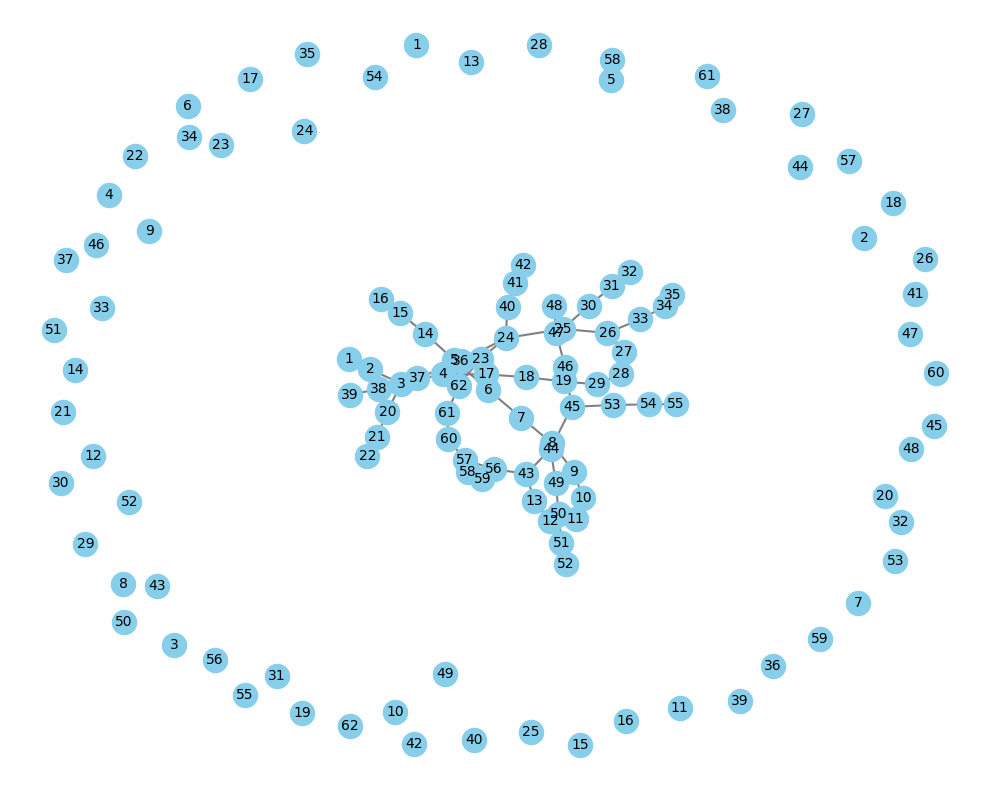

In [27]:
graph.visualize()

2025-05-18 22:21:00.541 | INFO     | utils.tool:visualize_attribute_distribution:968 - 可视化属性 node 'DG' 分布
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1014: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1014: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1014: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1014: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1014: UserWarning: Glyph 23646 (\N{CJK UNIFIED IDEOGRAPH-5C5E})

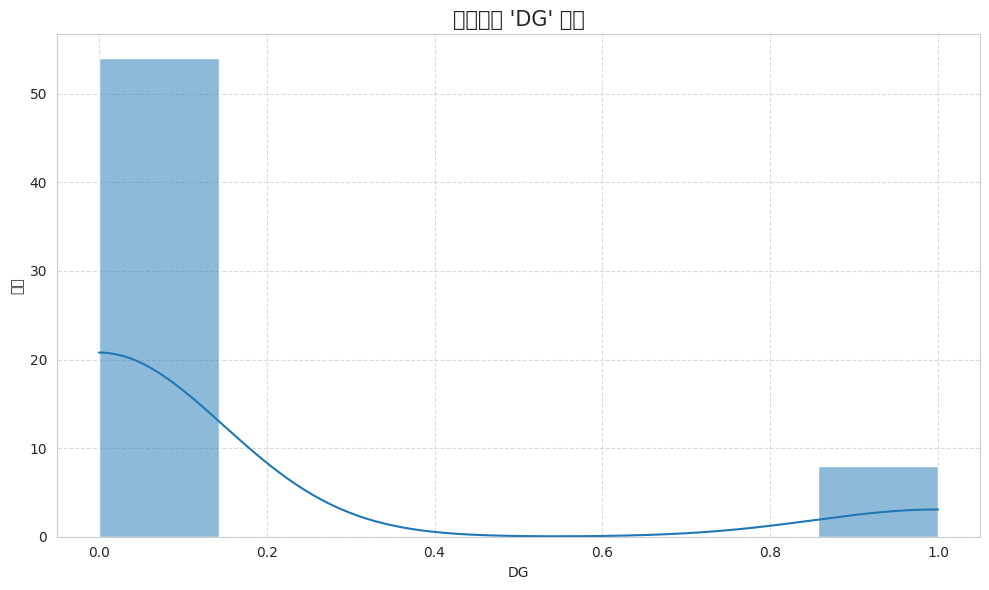

In [28]:
graph.visualize_attribute_distribution("DG")


In [29]:
graph.visualize_communities('louvain')

2025-05-18 22:21:00.648 | INFO     | utils.tool:visualize_communities:1088 - 社区检测并可视化，算法: louvain
2025-05-18 22:21:00.649 | INFO     | utils.tool:to_networkx:841 - 转换为NetworkX图对象
2025-05-18 22:21:00.650 | ERROR    | utils.tool:visualize_communities:1147 - 无法使用所选社区检测算法，请安装相应的包


无法使用所选社区检测算法，请安装相应的包
使用Louvain算法需要安装python-louvain包: pip install python-louvain


2025-05-18 22:21:00.657 | INFO     | utils.tool:visualize_degree_distribution:937 - 可视化节点度分布
2025-05-18 22:21:00.658 | INFO     | utils.tool:get_all_degrees:714 - 获取所有节点的度
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:946: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:946: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:946: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:946: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:9

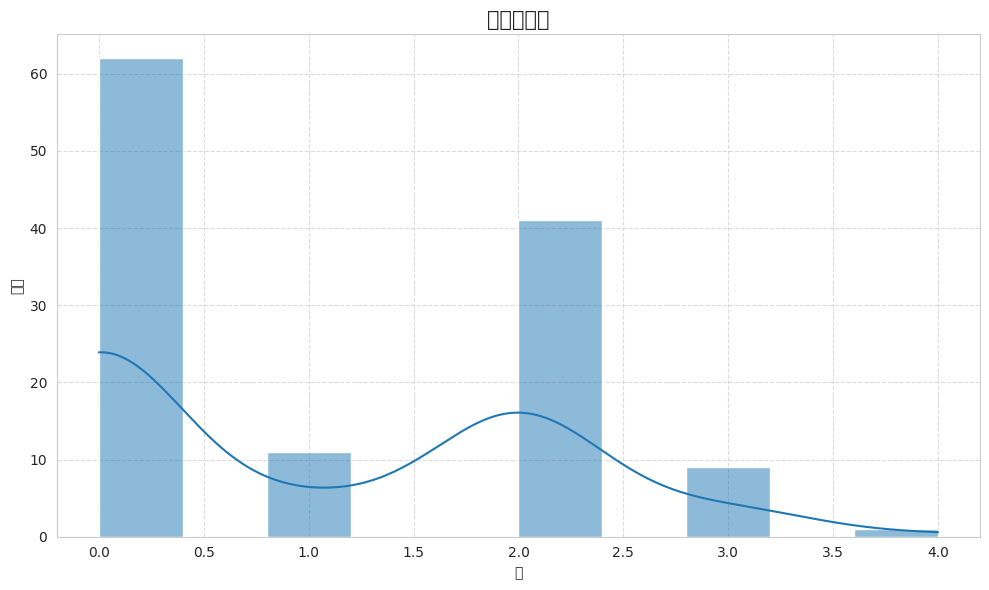

平均度: 1.00
中位数度: 0.50
最大度: 4
最小度: 0
度标准差: 1.09


In [30]:
graph.visualize_degree_distribution()

2025-05-18 22:21:00.825 | INFO     | utils.tool:visualize_degree_distribution:937 - 可视化节点度分布
2025-05-18 22:21:00.826 | INFO     | utils.tool:get_all_degrees:714 - 获取所有节点的度
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:946: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:946: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:946: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:946: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:9

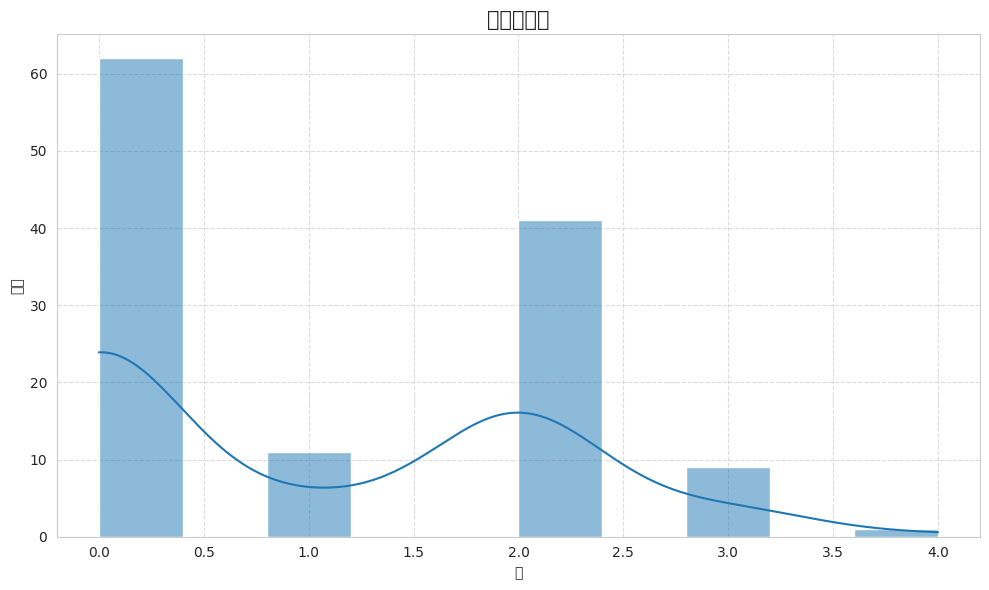

平均度: 1.00
中位数度: 0.50
最大度: 4
最小度: 0
度标准差: 1.09


In [31]:
graph.visualize_degree_distribution()

2025-05-18 22:21:00.944 | INFO     | utils.tool:visualize_graph_metrics:1024 - 可视化图的各种度量指标
2025-05-18 22:21:00.945 | INFO     | utils.tool:to_networkx:841 - 转换为NetworkX图对象
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1064: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1064: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1064: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.py:1064: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/diego/文档/JNU-you-beauty-common-model-program/深圳杯C题/utils/tool.

<Figure size 1500x1000 with 0 Axes>

/home/diego/文档/JNU-you-beauty-common-model-program/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diego/文档/JNU-you-beauty-common-model-program/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diego/文档/JNU-you-beauty-common-model-program/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diego/文档/JNU-you-beauty-common-model-program/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io

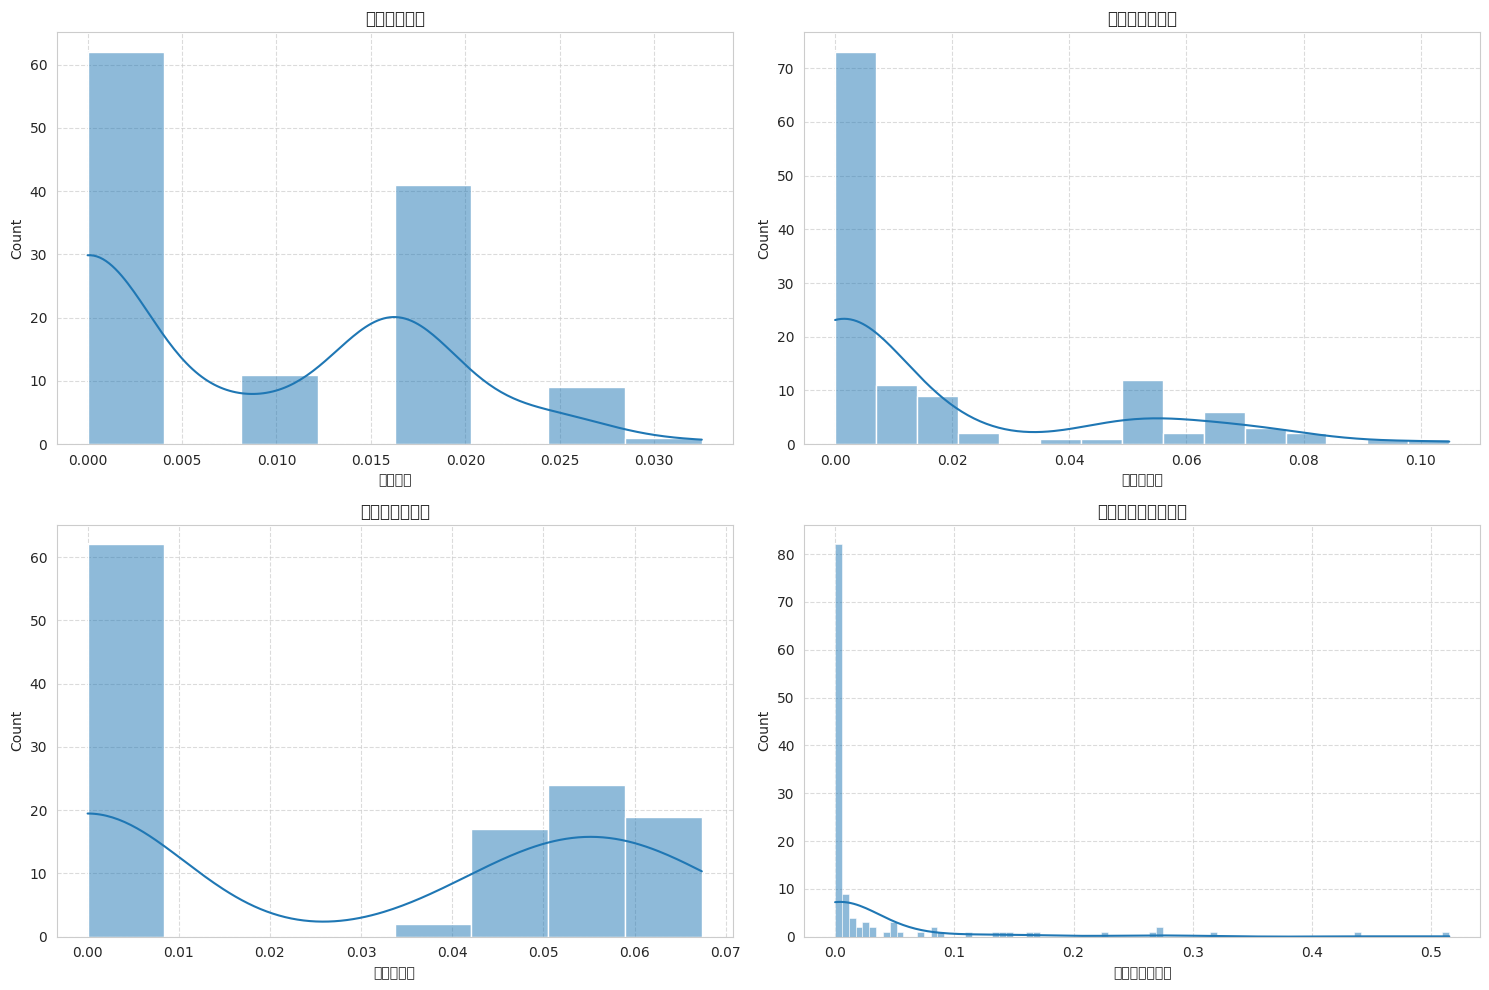

每种中心性指标的TOP 5节点:

度中心性 TOP 5:
  1. 节点 24: 0.0325
  2. 节点 3: 0.0244
  3. 节点 4: 0.0244
  4. 节点 5: 0.0244
  5. 节点 25: 0.0244

介数中心性 TOP 5:
  1. 节点 43: 0.1049
  2. 节点 24: 0.0962
  3. 节点 25: 0.0788
  4. 节点 44: 0.0770
  5. 节点 57: 0.0757

接近中心性 TOP 5:
  1. 节点 24: 0.0674
  2. 节点 43: 0.0668
  3. 节点 25: 0.0665
  4. 节点 23: 0.0662
  5. 节点 56: 0.0659

特征向量中心性 TOP 5:
  1. 节点 24: 0.5152
  2. 节点 25: 0.4376
  3. 节点 26: 0.3179
  4. 节点 23: 0.2728
  5. 节点 36: 0.2706


In [32]:
graph.visualize_graph_metrics()